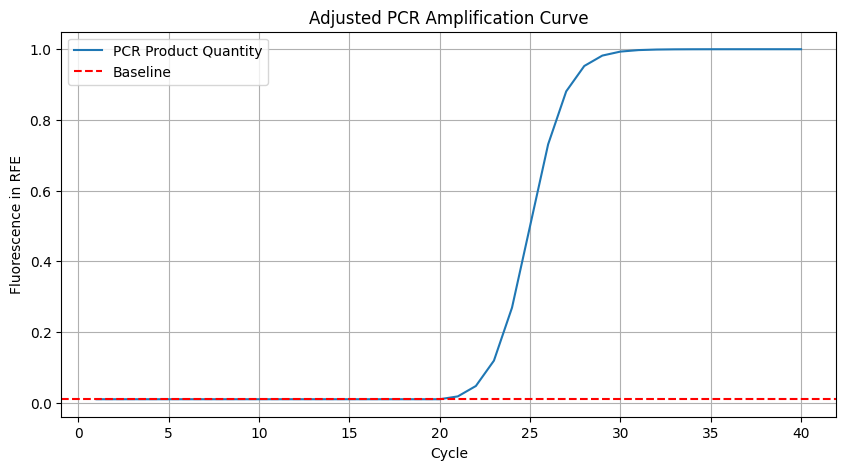

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PCR curve parameters
cycles = np.arange(1, 41)  # 40 cycles total
initial_phase_cycles = 20
inflection_cycle = 25
exponential_phase_end = 36
final_phase_cycles = 36

# Adjust the PCR curve to more accurately reflect a sigmoid shape
def sigmoid_pcr_curve(cycle, initial_phase_cycles, inflection_cycle, exponential_phase_end, final_phase_cycles, baseline):
    L = 1  # Assuming the maximum fluorescence value is normalized to 1
    k = 1  # This is a guess for the logistic growth rate; you may need to adjust this
    
    if cycle <= initial_phase_cycles:
        return baseline  # Baseline value (considered as noise level)
    elif initial_phase_cycles < cycle <= exponential_phase_end:
        # Logistic growth function for the exponential phase
        return L / (1 + np.exp(-k * (cycle - inflection_cycle)))
    elif cycle <= final_phase_cycles:
        # Transition to the plateau phase
        return L / (1 + np.exp(-k * (exponential_phase_end - inflection_cycle))) * \
               (1 - np.exp(-0.05 * (cycle - exponential_phase_end)))
    else:
        # Final phase where the curve has plateaued
        return L

# Generate the PCR curve
baseline = 0.01  # Baseline fluorescence level
pcr_signal = np.array([sigmoid_pcr_curve(c, initial_phase_cycles, inflection_cycle, exponential_phase_end, final_phase_cycles, baseline) for c in cycles])

# Plot the PCR curve
plt.figure(figsize=(10,5))
plt.plot(cycles, pcr_signal, label='PCR Product Quantity')
# plt.axvline(x=inflection_cycle, color='r', linestyle='--', label='Threshold cycle')  # change to be a calculated cq value eventually
plt.axhline(y=baseline, color='r', linestyle='--', label='Baseline')
plt.xlabel('Cycle')
plt.ylabel('Fluorescence in RFE')
plt.title('Adjusted PCR Amplification Curve')
plt.legend()
plt.grid(True)
plt.show()


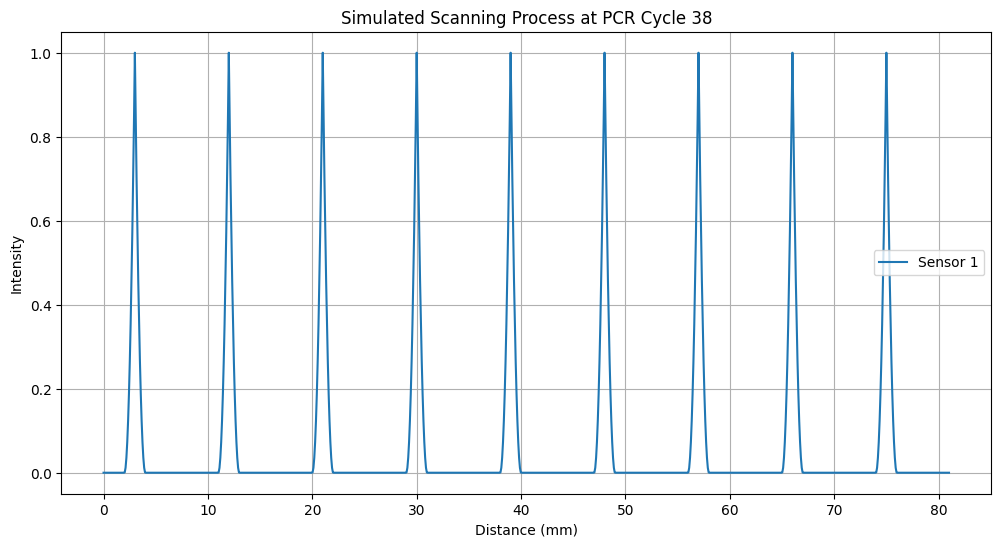

In [11]:
# Choosing a specific cycle, for example, cycle 2
chosen_cycle = 38
chosen_cycle_intensity = pcr_signal[chosen_cycle - 1]  # Adjusting for zero-indexing

def simulate_scanning_with_constant_cycle(distances, carriage_pitch, aperture_pitch, num_detectors, detector_diameter, chosen_cycle_intensity):
    sensor_signals = np.zeros((len(distances), num_detectors))
    for i, distance in enumerate(distances):
        for detector in range(num_detectors):
            detector_position = (distance + start_alignment_offset + detector * carriage_pitch) % aperture_pitch
            overlap = max(0, (detector_diameter / 2) - abs(detector_position - aperture_pitch / 2))
            intensity = (overlap / (detector_diameter / 2)) ** 2 if overlap > 0 else 0
            # Use the intensity from the chosen PCR cycle
            sensor_signals[i, detector] = intensity * chosen_cycle_intensity
    return sensor_signals

# Calculate sensor signals with constant cycle intensity
constant_cycle_sensor_signals = simulate_scanning_with_constant_cycle(distances, carriage_pitch, aperture_pitch, num_detectors, detector_diameter, chosen_cycle_intensity)

# Plot the scanning process for each sensor with constant cycle intensity
plt.figure(figsize=(12, 6))
for detector in range(1):
    plt.plot(distances, constant_cycle_sensor_signals[:, detector], label=f'Sensor {detector + 1}')
plt.xlabel('Distance (mm)')
plt.ylabel('Intensity')
plt.title(f'Simulated Scanning Process at PCR Cycle {chosen_cycle}')
plt.legend()
plt.grid(True)
plt.show()
